In [274]:
# Weather Analysis - PROMICE DATA (for temperatures)

# Version 09  (last updated: 14/06/2020)
# Author: Nuno Canha
# Goal of the script: using an input dataset of weather data (eg., KAN_B for a 10 year period), this script will evaluated the variability of temperature, 
# focusing on time-series, heat map and csv files with daily, weekly, monthly and annual averaged data.

In [275]:
# Remark: daily, monthly and yearly average analysis are done considering all values in the dataset. 
# Evaluation of valid and non-valid data is only for information purposes.

# IMPORTANT: the input CSV file should be similar to the example.

In [276]:
# To run this notebook, you will only need to:
# 1) Define the working folder
# 2) Enter the name of the weather station that you are analysing

In [277]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Weather\\Analysis\\KAN_B\\2'

In [278]:
cd C:\Users\Nuno Canha\Desktop\Python\Weather\Analysis\KAN_B\2

C:\Users\Nuno Canha\Desktop\Python\Weather\Analysis\KAN_B\2


In [279]:
# Upload the analysis packages

In [280]:
import pandas as pd

In [281]:
import matplotlib.pyplot as plt
from datetime import datetime

In [282]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [283]:
# Loading the data
name = input('Which weather station is being analised?')

Which weather station is being analised? KAN_B


In [284]:
data = pd.read_csv("input.csv", delimiter=",", usecols=['Year','MonthOfYear', 'DayOfMonth', 'HourOfDay(UTC)','AirTemperature(C)'], na_values=['-999.0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

In [285]:
data.head()

,Year,MonthOfYear,DayOfMonth,HourOfDay(UTC),AirTemperature(C)
0,2011,4,13,0,NaN
1,2011,4,13,1,NaN
2,2011,4,13,2,NaN
3,2011,4,13,3,NaN
4,2011,4,13,4,NaN


In [286]:
# Parameters of interest to assess its temporal variability: Air Temperature (ºC)

In [287]:
# "Air Temperature (ºC)" stands for Primary air temperature. Measurement height is approximately
# HeightSensorBoom – 0.1m, or 2.6m over bare ice surfaces.
# More information about the dataset is available at 
# https://promice.org/PromiceDataPortal/api/download/f24019f7-d586-4465-8181-d4965421e6eb/v03/monthly/readme+PROMICE+AWS+data.pdf

In [288]:
# To rename the columns' names to simplify the code writting 
new_names={'Year':'year','MonthOfYear':'month','DayOfMonth': 'day', 'HourOfDay(UTC)': 'hours', 'AirTemperature(C)':'Temp' }
data = data.rename(columns=new_names)

In [289]:
type(data)

pandas.core.frame.DataFrame

In [290]:
# Print data types within the Pandas dataframe
data.dtypes

year       int64
month      int64
day        int64
hours      int64
Temp     float64
dtype: object

In [291]:
# Get descritive statistics summary only for "Temp":
data[['Temp']].describe()

,Temp
count,75577.000000
mean,-4.338423
std,10.725182
min,-37.160000
25%,-12.840000
50%,-2.310000
75%,4.920000
max,15.460000


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77348 entries, 0 to 77347
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    77348 non-null  int64  
 1   month   77348 non-null  int64  
 2   day     77348 non-null  int64  
 3   hours   77348 non-null  int64  
 4   Temp    75577 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 3.0 MB


In [293]:
# Create a column for the timestamp in a new dataset (with only 2 columns: timestamp and Temp):

In [294]:
data['Date']=pd.to_datetime(data[['year','month','day','hours']])
data1= data[['Date']].join(data[['Temp']])
data1 = data1.set_index('Date')

In [295]:
data1.dtypes

Temp    float64
dtype: object

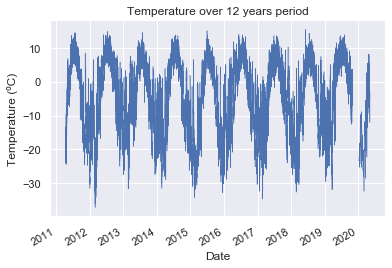

In [296]:
# Add columns with year, month, and weekday name

data1['Year'] = data1.index.year
data1['Month'] = data1.index.month
data1['Day'] = data1.index.day
data1['Hour'] = data1.index.hour

data1

# Plot of the time series of Temp data:

fig1 = data1['Temp'].plot(linewidth=0.5, title ='Temperature over 12 years period');
fig1.set_xlabel('Date')
fig1.set_ylabel('Temperature (ºC)')
fig1.grid(True)

# To save the figure
plt.savefig('Fig1 - Temperature over 12 years @ '+ name)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

In [297]:
# Import seaborn for visualisation tools

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

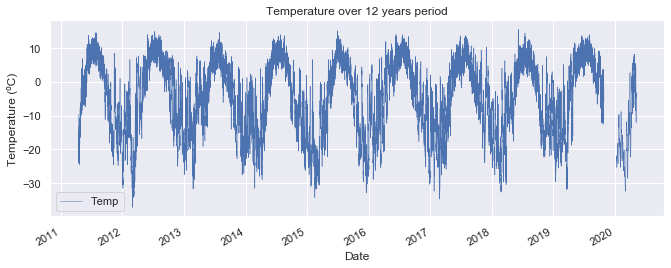

In [298]:
# Let’s create a line plot of the full time series of Temp, using the DataFrame’s plot() method.

fig1a = data.plot('Date', 'Temp', title ='Temperature over 12 years period',linewidth=0.5);
fig1a.set_xlabel('Date')
fig1a.set_ylabel('Temperature (ºC)')
fig1a.grid(True)

# To save the figure
plt.savefig('Fig1A - Temperature over 12 years @ '+ name)

In [299]:
data1

,Temp,Year,Month,Day,Hour
Date,,,,,
2011-04-13 00:00:00,NaN,2011,4,13,0
2011-04-13 01:00:00,NaN,2011,4,13,1
2011-04-13 02:00:00,NaN,2011,4,13,2
2011-04-13 03:00:00,NaN,2011,4,13,3
2011-04-13 04:00:00,NaN,2011,4,13,4
...,...,...,...,...,...
2020-05-05 19:00:00,-3.33,2020,5,5,19
2020-05-05 20:00:00,-3.65,2020,5,5,20
2020-05-05 21:00:00,-4.24,2020,5,5,21


In [300]:
# Check the statistics of the database:
data1.describe()

,Temp,Year,Month,Day,Hour
count,75577.000000,77348.000000,77348.000000,77348.000000,77348.000000
mean,-4.338423,2015.184672,6.622279,15.748798,11.513678
std,10.725182,2.559578,3.412058,8.804538,6.929459
min,-37.160000,2011.000000,1.000000,1.000000,0.000000
25%,-12.840000,2013.000000,4.000000,8.000000,6.000000
50%,-2.310000,2015.000000,7.000000,16.000000,12.000000
75%,4.920000,2017.000000,10.000000,23.000000,18.000000
max,15.460000,2020.000000,12.000000,31.000000,23.000000


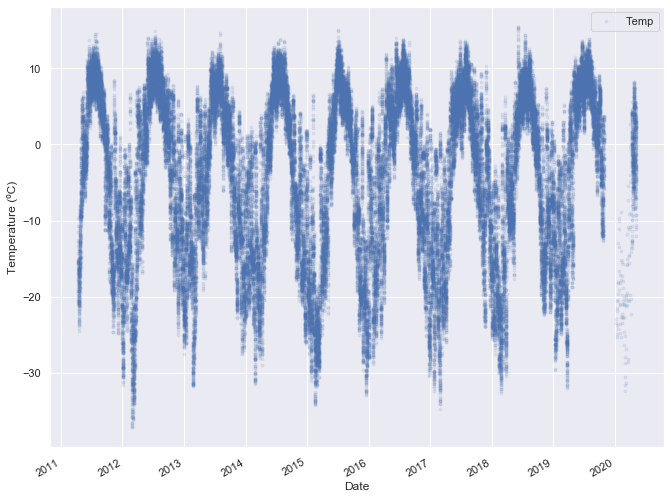

In [301]:
#  We can see that the plot() method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful.
#  However, with so many data points, the line plot is crowded and hard to read.
#  Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

cols_plot = ['Temp']
axes = data1[cols_plot].plot(marker='.', alpha=0.1, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Temperature (ºC)')
    
# To save the figure
plt.savefig('Fig1B - Temperature over 12 years @ '+ name)

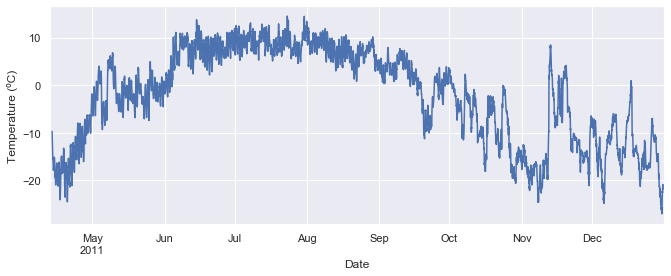

In [302]:
# Seasonality can also occur on other time scales.

# Let’s plot the time series in a single year to investigate further.

ax = data1.loc['2011', 'Temp'].plot()
ax.set_ylabel('Temperature (ºC)');

# To save the figure
plt.savefig('Fig2 - Temperature 2017 @ '+ name)

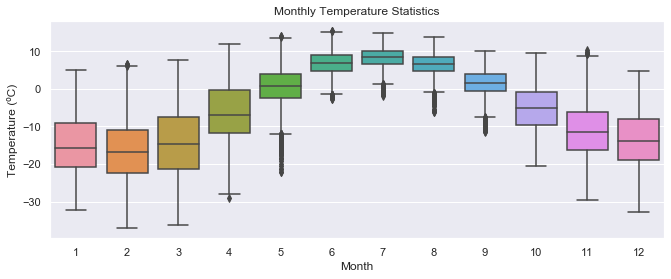

In [303]:
# Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() 
# function to group the data by different time periods and display the distributions for each group.
# We’ll first group the data by month, to visualize yearly seasonality.
# For more information, check at: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Monthly Temperature Statistics
ax1 = sns.boxplot(x="Month", y="Temp", data=data1)
ax1.set_ylabel('Temperature (ºC)')
ax1.set_title('Monthly Temperature Statistics')

# To save the figure
plt.savefig('Fig3 - Boxplot of Monthly Temperatures @ '+ name)

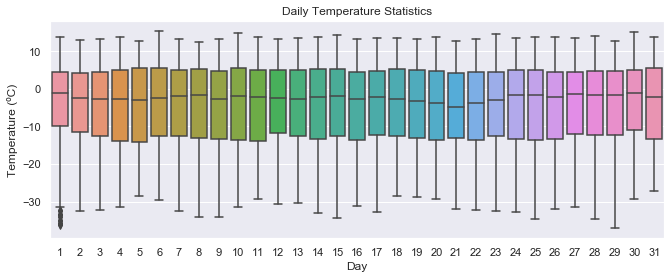

In [304]:
# Next, let’s group the temperature time series by day of the week, to explore weekly seasonality.

# Daily Temperature Statistics
ax2 = sns.boxplot(data=data1, x='Day', y='Temp');
ax2.set_ylabel('Temperature (ºC)')
ax2.set_title('Daily Temperature Statistics')

# To save the figure
plt.savefig('Fig4 - Boxplot of Daily Temperatures @ '+ name)

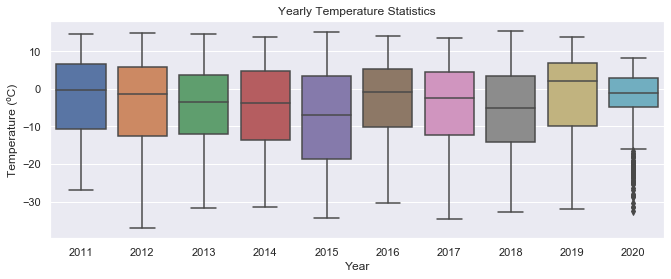

In [305]:
# Yearly Temperature Statistics:

ax3 = sns.boxplot(data=data1, x='Year', y='Temp');
ax3.set_ylabel('Temperature (ºC)')
ax3.set_title('Yearly Temperature Statistics')

# To save the figure
plt.savefig('Fig5 - Boxplot of Yearly Temperatures @ '+ name)

In [306]:
# Frequencies

# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2011-02-03', '2011-02-06', '2011-02-08'])
times_sample

DatetimeIndex(['2011-02-03', '2011-02-06', '2011-02-08'], dtype='datetime64[ns]', freq=None)

In [307]:
# Check data1


In [308]:
data1

,Temp,Year,Month,Day,Hour
Date,,,,,
2011-04-13 00:00:00,NaN,2011,4,13,0
2011-04-13 01:00:00,NaN,2011,4,13,1
2011-04-13 02:00:00,NaN,2011,4,13,2
2011-04-13 03:00:00,NaN,2011,4,13,3
2011-04-13 04:00:00,NaN,2011,4,13,4
...,...,...,...,...,...
2020-05-05 19:00:00,-3.33,2020,5,5,19
2020-05-05 20:00:00,-3.65,2020,5,5,20
2020-05-05 21:00:00,-4.24,2020,5,5,21


In [309]:
data1.index

DatetimeIndex(['2011-04-13 00:00:00', '2011-04-13 01:00:00',
               '2011-04-13 02:00:00', '2011-04-13 03:00:00',
               '2011-04-13 04:00:00', '2011-04-13 05:00:00',
               '2011-04-13 06:00:00', '2011-04-13 07:00:00',
               '2011-04-13 08:00:00', '2011-04-13 09:00:00',
               ...
               '2020-05-05 14:00:00', '2020-05-05 15:00:00',
               '2020-05-05 16:00:00', '2020-05-05 17:00:00',
               '2020-05-05 18:00:00', '2020-05-05 19:00:00',
               '2020-05-05 20:00:00', '2020-05-05 21:00:00',
               '2020-05-05 22:00:00', '2020-05-05 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=77348, freq=None)

In [310]:
# Resampling

In [311]:
# Specify the data columns we want to include (i.e. exclude Temp)
data_columns = ['Temp']

# Resample to weekly frequency, aggregating with mean
data1_weekly_mean = data1[data_columns].resample('W').mean()
data1_weekly_mean.head(3)

,Temp
Date,
2011-04-17,-17.956471
2011-04-24,-16.322083
2011-05-01,-8.764107


In [312]:
print(data1.shape[0])
print(data1_weekly_mean.shape[0])

77348
474


In [313]:
# Let’s plot the hourly and weekly Temp time series together over a single 12-month period to compare them.

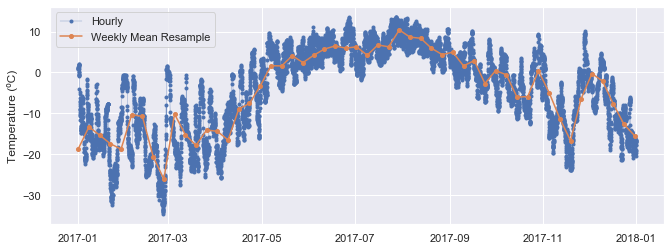

In [314]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-12'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data1.loc[start:end, 'Temp'],
marker='.', linestyle='-', linewidth=0.3, label='Hourly')
ax.plot(data1_weekly_mean.loc[start:end, 'Temp'],
marker='o', markersize=4, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature (ºC)')
ax.legend();
plt.savefig('Fig6 - Hourly and weekly mean Temperature @ '+ name)

In [315]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data


# How to compute Averages
# Daily averages are calculated from hourly averages if > 20 values are available.
# Monthly averages are calculated from daily averages if > 24 values are available.

In [316]:
# Resample getting a several statistics parameters - Daily data
daily = data1['Temp'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
daily['Year'] = daily.index.year
daily['Month'] = daily.index.month
daily['Day'] = daily.index.day
daily

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2011-04-13,-11.765000,1.362186,6,-11.995,-13.30,-9.71,2011,4,13
2011-04-14,-16.328750,1.183397,24,-15.965,-19.28,-14.24,2011,4,14
2011-04-15,-18.681667,1.527674,24,-19.075,-20.97,-16.37,2011,4,15
2011-04-16,-19.054167,1.779377,24,-19.550,-21.22,-16.17,2011,4,16
2011-04-17,-19.309167,3.261157,24,-18.975,-24.08,-14.90,2011,4,17
...,...,...,...,...,...,...,...,...,...
2020-05-01,0.847917,2.471899,24,0.715,-2.14,5.38,2020,5,1
2020-05-02,0.427917,2.225002,24,0.305,-3.24,3.66,2020,5,2
2020-05-03,2.200833,1.111333,24,2.250,0.10,4.37,2020,5,3


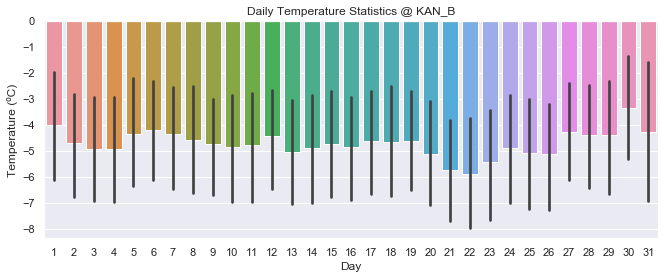

In [317]:
# Plot of box plots of daily data:
Fig4a = sns.barplot(x="Day", y="mean", data=daily)
Fig4a.set_ylabel('Temperature (ºC)')
Fig4a.set_title('Daily Temperature Statistics @ '+ name)

plt.savefig('Fig4A - Mean Daily Temperatures @ '+ name)

In [318]:
# Add a collumn to the dataset regarding if the data is valid or nort (minimum number of datapoints):
import numpy as np

daily['valid']=np.where(daily['count'] >= 21,daily['count'], 'Not Valid')
print(daily)

# Writing and saving file with all data
daily_sel = daily
output_daily_sel = 'Daily_Stats_'+name+'.csv'
daily.to_csv(output_daily_sel, sep=',')
output_daily_sel2 = 'Daily_Stats.csv'
daily.to_csv(output_daily_sel2, sep=',')

                 mean       std  count  median    min    max  Year  Month  \
Date                                                                        
2011-04-13 -11.765000  1.362186      6 -11.995 -13.30  -9.71  2011      4   
2011-04-14 -16.328750  1.183397     24 -15.965 -19.28 -14.24  2011      4   
2011-04-15 -18.681667  1.527674     24 -19.075 -20.97 -16.37  2011      4   
2011-04-16 -19.054167  1.779377     24 -19.550 -21.22 -16.17  2011      4   
2011-04-17 -19.309167  3.261157     24 -18.975 -24.08 -14.90  2011      4   
...               ...       ...    ...     ...    ...    ...   ...    ...   
2020-05-01   0.847917  2.471899     24   0.715  -2.14   5.38  2020      5   
2020-05-02   0.427917  2.225002     24   0.305  -3.24   3.66  2020      5   
2020-05-03   2.200833  1.111333     24   2.250   0.10   4.37  2020      5   
2020-05-04  -3.005000  1.983850     24  -2.910  -6.12   0.78  2020      5   
2020-05-05  -6.792500  2.799753     24  -6.685 -12.03  -3.27  2020      5   

In [319]:
# Selecting valid and non-valid data

daily_valid = daily['mean'].loc[daily['valid'] != 'Not Valid']

In [320]:
daily_valid

Date
2011-04-14   -16.328750
2011-04-15   -18.681667
2011-04-16   -19.054167
2011-04-17   -19.309167
2011-04-18   -16.319583
                ...    
2020-05-01     0.847917
2020-05-02     0.427917
2020-05-03     2.200833
2020-05-04    -3.005000
2020-05-05    -6.792500
Name: mean, Length: 3145, dtype: float64

In [321]:
# Selecting Non-Valid data (less than 21 hourly values):

daily_NV = daily['mean'].loc[daily['valid'] == 'Not Valid']
daily_NV

Date
2011-04-13   -11.765
2019-10-27       NaN
2019-10-28       NaN
2019-10-29       NaN
2019-10-30       NaN
               ...  
2020-04-04   -14.130
2020-04-05    -9.030
2020-04-06   -13.580
2020-04-07    -9.920
2020-04-08       NaN
Name: mean, Length: 166, dtype: float64

In [322]:
# We now have generated 2 data series (with valid and non valid daily data)

Legend:
Green - valid data (> 21 hourly values)
Red - Non valid data (<= 20 hourly values)


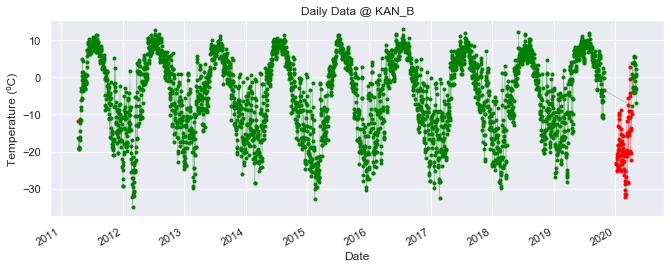

In [323]:
# Example plot of daily data
ax1 = daily_NV.plot(color='red', marker='.', linewidth=0.2, label='Non Valid')
ax1 = daily_valid.plot(color='green', marker='.', linewidth=0.2, label='Valid')
ax1.set_ylabel('Temperature (ºC)')
ax1.set_title('Daily Data @ '+ name)
plt.savefig('Fig7 - Valid and Non-valid Daily Mean Temperatures @ '+ name) 

print('Legend:')
print('Green - valid data (> 21 hourly values)')
print('Red - Non valid data (<= 20 hourly values)')

In [324]:
# Percentage of Non valid Daily data

daily_p = len(daily_NV)/len(daily)*100

print("The percentage of days with non valid data in the dataset is", round(daily_p, 1), "%." )

The percentage of days with non valid data in the dataset is 5.0 %.


In [325]:
# Resample getting a several statistics parameters - Monthly data
daily_V = daily[daily['valid']!='Non Valid']
monthly = daily['mean'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthly['Year'] = monthly.index.year
monthly['Month'] = monthly.index.month
monthly

,mean,std,count,median,min,max,Year,Month
Date,,,,,,,,
2011-04-30,-14.286921,4.201586,18,-15.315625,-19.309167,-6.159583,2011,4
2011-05-31,-1.397527,2.349829,31,-1.397500,-5.956667,4.927500,2011,5
2011-06-30,7.039333,2.372762,30,7.427917,0.420000,10.263333,2011,6
2011-07-31,9.005161,1.277265,31,8.839167,6.751250,11.531250,2011,7
2011-08-31,7.187204,1.699416,31,7.305000,3.876667,10.248333,2011,8
...,...,...,...,...,...,...,...,...
2020-01-31,-19.172400,4.640895,25,-20.500000,-25.330000,-9.640000,2020,1
2020-02-29,-21.192759,4.765795,29,-21.160000,-30.500000,-8.840000,2020,2
2020-03-31,-16.338387,9.162622,31,-15.670000,-32.400000,2.680000,2020,3


In [326]:
# Check the month with highest and lowest temperatures:
x= monthly['mean'].min()


z = monthly['Year'].loc[(monthly['mean'] == x)]

print('The lowest mean temperature (in ºC) reached was', round(x, 3), 'ºC in', z)

The lowest mean temperature (in ºC) reached was -21.797 ºC in Date
2015-02-28    2015
Freq: M, Name: Year, dtype: int64


In [327]:
# Minimum and maximum values in monthly temperatures
print('Minimum and maximum values in monthly temperatures:')
print('The coldest month was:')
a = monthly['mean'].max()
Mmin = monthly.loc[(monthly['mean'] == x)]
print(Mmin)
print('The warmest month was:')
b = monthly['mean'].max()
Mmax = monthly.loc[(monthly['mean'] == b)]
print(Mmax)

Minimum and maximum values in monthly temperatures:
The coldest month was:
                 mean       std  count     median       min       max  Year  \
Date                                                                          
2015-02-28 -21.797247  7.023985     28 -23.565417 -32.67875 -1.624167  2015   

            Month  
Date               
2015-02-28      2  
The warmest month was:
                mean       std  count    median       min        max  Year  \
Date                                                                         
2012-07-31  9.184745  1.398788     31  9.185417  6.616667  12.666667  2012   

            Month  
Date               
2012-07-31      7  


In [328]:
# Evaluate if monthly data is valid or not
# Monthly averages are calculated from daily averages if > 24 values are available.

monthly['valid']=np.where(monthly['count'] >= 25, monthly['count'], 'Not Valid')
print(monthly)

# Writing and saving file with all data
monthly_sel = monthly
output_monthly_sel = 'Monthly_Stats.csv'
monthly.to_csv(output_monthly_sel, sep=',')
output_monthly_sel2 = 'Monthly_Stats_'+name+'.csv'
monthly.to_csv(output_monthly_sel, sep=',')

                 mean       std  count     median        min        max  Year  \
Date                                                                            
2011-04-30 -14.286921  4.201586     18 -15.315625 -19.309167  -6.159583  2011   
2011-05-31  -1.397527  2.349829     31  -1.397500  -5.956667   4.927500  2011   
2011-06-30   7.039333  2.372762     30   7.427917   0.420000  10.263333  2011   
2011-07-31   9.005161  1.277265     31   8.839167   6.751250  11.531250  2011   
2011-08-31   7.187204  1.699416     31   7.305000   3.876667  10.248333  2011   
...               ...       ...    ...        ...        ...        ...   ...   
2020-01-31 -19.172400  4.640895     25 -20.500000 -25.330000  -9.640000  2020   
2020-02-29 -21.192759  4.765795     29 -21.160000 -30.500000  -8.840000  2020   
2020-03-31 -16.338387  9.162622     31 -15.670000 -32.400000   2.680000  2020   
2020-04-30  -3.844425  7.875652     29  -2.710833 -22.290000   5.815833  2020   
2020-05-31  -1.264167  3.637

Legend:
Green - valid data (> 24 hourly values)
Red - Non valid data (<= 24 hourly values)


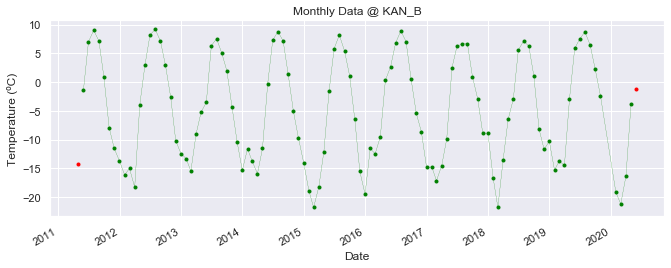

In [329]:
# Selecting valid and non-valid data

monthly_valid = monthly['mean'].loc[monthly['valid'] != 'Not Valid']
monthly_NV = monthly['mean'].loc[monthly['valid'] == 'Not Valid']

# Example plot of monthly data
Fig8 = monthly_NV.plot(color='red', marker='.', linewidth=0.2, label='Non Valid')
Fig8 = monthly_valid.plot(color='green', marker='.', linewidth=0.2, label='Valid')
Fig8.set_ylabel('Temperature (ºC)')
Fig8.set_title('Monthly Data @ '+ name)
plt.savefig('Fig8 - Valid and Non-valid Monthly Mean Temperatures @ '+ name) 

print('Legend:')
print('Green - valid data (> 24 hourly values)')
print('Red - Non valid data (<= 24 hourly values)')

In [330]:
# Percentage of Non valid Monthly data

monthly_p = len(monthly_NV)/len(monthly)*100

print("The percentage of months with non valid data in the dataset is", round(monthly_p,1), "%." )

The percentage of months with non valid data in the dataset is 3.6 %.


In [331]:
monthly['mean'].describe()

count    108.000000
mean      -4.819042
std        9.334083
min      -21.797247
25%      -13.635134
50%       -4.720457
75%        5.140309
max        9.184745
Name: mean, dtype: float64

In [332]:
monthly['mean'].min()

-21.797247023809526

In [333]:
# Check the warmest and coldest months
x = monthly.sort_values(by="mean", ascending=False).head(10)
print("The warmest months were:", x)

y = monthly.sort_values(by="mean", ascending=False).tail(10)
print("The coldest months were:", y)

The warmest months were:                 mean       std  count    median       min        max  Year  \
Date                                                                         
2012-07-31  9.184745  1.398788     31  9.185417  6.616667  12.666667  2012   
2011-07-31  9.005161  1.277265     31  8.839167  6.751250  11.531250  2011   
2016-07-31  8.914220  1.337215     31  8.817500  7.210000  12.959167  2016   
2014-07-31  8.794798  1.137210     31  8.764583  5.517500  10.605417  2014   
2019-07-31  8.750968  1.361978     31  9.029583  4.927083  11.568750  2019   
2012-06-30  8.227417  1.821302     30  8.238542  3.973333  11.369167  2012   
2015-07-31  8.205108  1.869970     31  8.455417  4.999583  11.379583  2015   
2013-07-31  7.558858  1.578904     31  7.678750  3.850833  11.102083  2013   
2019-06-30  7.522708  1.959699     30  7.645208  3.949167  11.165833  2019   
2014-06-30  7.333833  1.929132     30  7.437083  3.617500  10.426667  2014   

            Month valid  
Date        

In [334]:
# Resample getting a several statistics parameters - Yearly data
# Considering the valid years only with data for 12 months

yearly= monthly['mean'].resample('Y').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
yearly['valid']=np.where(yearly['count'] == 12, yearly['count'], 'Not Valid')
print(yearly)

print('Condition for a yearly mean: 12 months included)')

                 mean        std  count     median        min       max  \
Date                                                                      
2011-12-31  -2.747683   9.378968      9  -1.397527 -14.286921  9.005161   
2012-12-31  -4.014033  10.131274     12  -3.290769 -18.296559  9.184745   
2013-12-31  -4.636743   8.359956     12  -4.779575 -15.485193  7.558858   
2014-12-31  -4.774902   9.238767     12  -7.404583 -15.925753  8.794798   
2015-12-31  -7.789405  11.198780     12  -9.292639 -21.797247  8.205108   
2016-12-31  -3.004653   8.412045     12  -2.565517 -14.839946  8.914220   
2017-12-31  -4.488782   8.939650     12  -5.874628 -17.143304  6.680417   
2018-12-31  -5.956922   9.511169     12  -7.329726 -21.778854  7.147944   
2019-12-31  -1.793000   9.596317     10  -0.032438 -15.297285  8.750968   
2020-12-31 -12.362428   9.163603      5 -16.338387 -21.192759 -1.264167   

                valid  
Date                   
2011-12-31  Not Valid  
2012-12-31         12  
201

In [335]:
# Check the warmest and coldest years
x1 = yearly.sort_values(by="mean", ascending=False).head(1)
print("The warmest year was:", x1)

y1 = yearly.sort_values(by="mean", ascending=False).tail(1)
print("The coldest year was:", y1)

The warmest year was:              mean       std  count    median        min       max      valid
Date                                                                        
2019-12-31 -1.793  9.596317     10 -0.032438 -15.297285  8.750968  Not Valid
The coldest year was:                  mean       std  count     median        min       max  \
Date                                                                     
2020-12-31 -12.362428  9.163603      5 -16.338387 -21.192759 -1.264167   

                valid  
Date                   
2020-12-31  Not Valid  


In [336]:
# Writing and saving file with all data
yearly_sel =yearly

# This final csv file will have 8 different collumns: 

output_yearly_sel = 'Yearly_Stats.csv'

# Save dataframe to csv
yearly.to_csv(output_yearly_sel, sep=',')

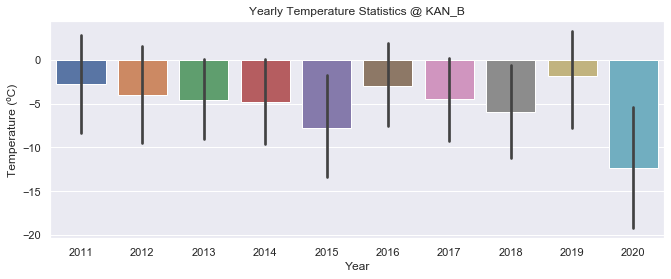

In [337]:
# Bar plot of yearly data:

Fig9 = sns.barplot(x="Year", y="mean", data=monthly)
Fig9.set_ylabel('Temperature (ºC)')
Fig9.set_title('Yearly Temperature Statistics @ '+ name)
plt.savefig('Fig9 - Bar plot Yearly Temperatures @ '+ name) 

Legend:
Green - valid data (12 months)
Red - Non valid data (less than 12 months)


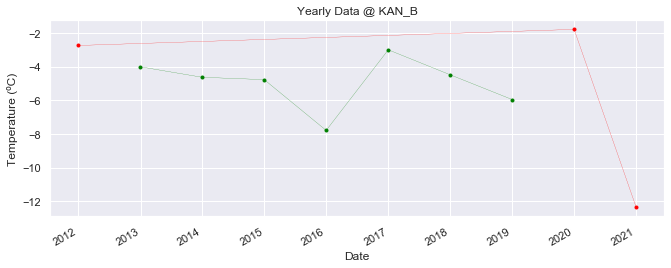

In [338]:
# Selecting valid and non-valid data

yearly_valid = yearly['mean'].loc[yearly['valid'] != 'Not Valid']
yearly_NV = yearly['mean'].loc[yearly['valid'] == 'Not Valid']

# Example plot of yearly data
Fig10 = yearly_NV.plot(color='red', marker='.', linewidth=0.2, label='Non Valid')
Fig10 = yearly_valid.plot(color='green', marker='.', linewidth=0.2, label='Valid')
Fig10.set_ylabel('Temperature (ºC)')
Fig10.set_title('Yearly Data @ '+ name)
plt.savefig('Fig10 - Valid and Non-valid Yearly Mean Temperatures @ '+ name) 

print('Legend:')
print('Green - valid data (12 months)')
print('Red - Non valid data (less than 12 months)')

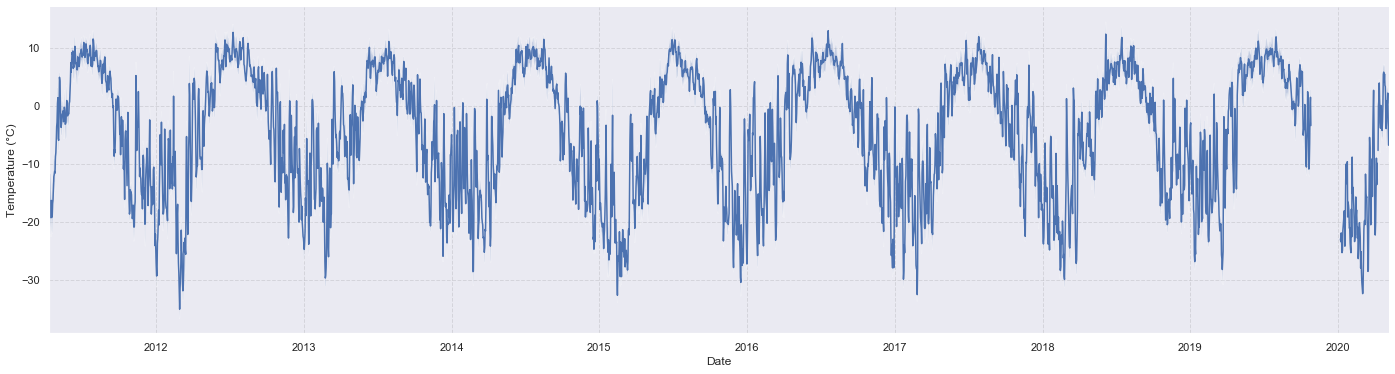

In [339]:
# Daily plot (Mean + SD) - All data

ax = daily['mean'].plot(figsize=(24, 6))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.1)
ax.fill_between(daily.index, daily['mean'] - daily['std'], daily['mean'] + daily['std'], alpha=.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()
plt.savefig('Fig11 - Daily Mean Temperatures - all data @ '+ name) 

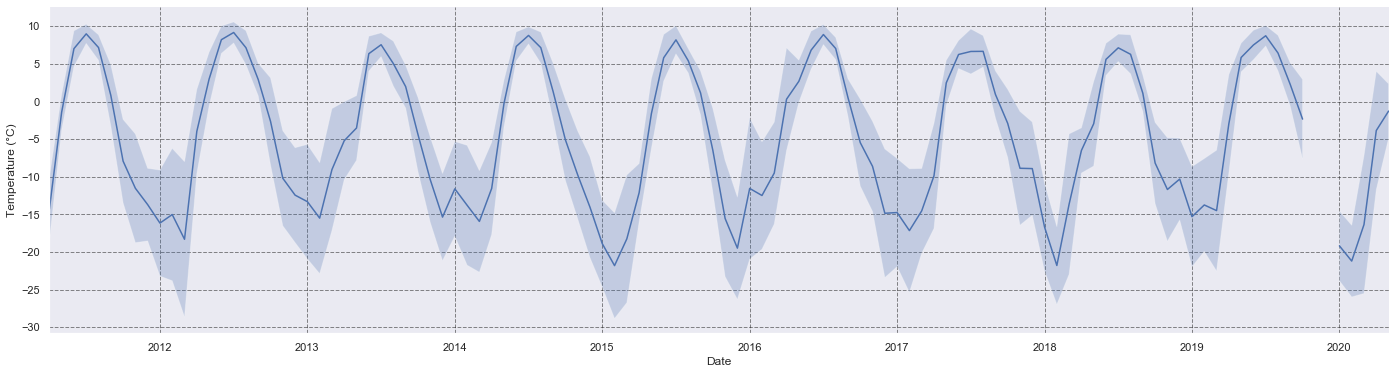

In [340]:
# Monthly plot (Mean + SD) - All data

ax = monthly['mean'].plot(figsize=(24, 6))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(monthly.index, monthly['mean'] - monthly['std'], monthly['mean'] + monthly['std'], alpha=.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()
plt.savefig('Fig12 - Monthly Mean Temperatures - all data @ '+ name) 

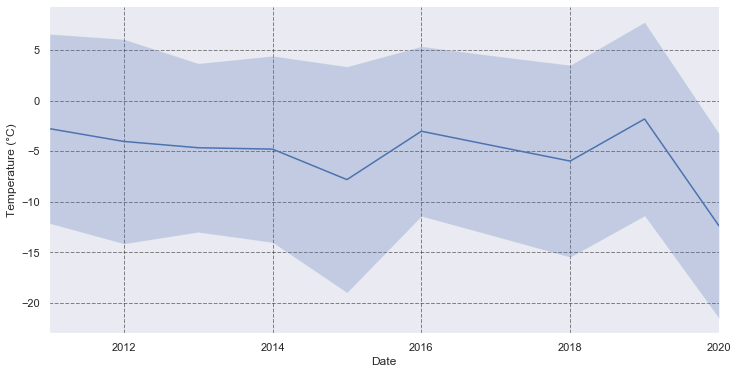

In [341]:
# Yearly plot (Mean + SD) - All data

ax = yearly['mean'].plot(figsize=(12, 6))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(yearly.index, yearly['mean'] - yearly['std'], yearly['mean'] + yearly['std'], alpha=.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()
plt.savefig('Fig13 - Yearly Mean Temperatures - all data @ '+ name)

In [342]:
# Checking for Stationarity

In [343]:
daily.head()

,mean,std,count,median,min,max,Year,Month,Day,valid
Date,,,,,,,,,,
2011-04-13,-11.765000,1.362186,6,-11.995,-13.30,-9.71,2011,4,13,Not Valid
2011-04-14,-16.328750,1.183397,24,-15.965,-19.28,-14.24,2011,4,14,24
2011-04-15,-18.681667,1.527674,24,-19.075,-20.97,-16.37,2011,4,15,24
2011-04-16,-19.054167,1.779377,24,-19.550,-21.22,-16.17,2011,4,16,24
2011-04-17,-19.309167,3.261157,24,-18.975,-24.08,-14.90,2011,4,17,24


In [344]:
# Dickey-Fuller test to evaluation the stationarity of the data

In [345]:
from statsmodels.tsa.stattools import adfuller

In [346]:
daily_s = pd.read_csv("Daily_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'],header=0, index_col=0)
daily_s

,mean
Date,
2011-04-13,-11.765000
2011-04-14,-16.328750
2011-04-15,-18.681667
2011-04-16,-19.054167
2011-04-17,-19.309167
...,...
2020-05-01,0.847917
2020-05-02,0.427917
2020-05-03,2.200833


In [347]:
# Erase NaN values:
series=daily_s.dropna()
series

,mean
Date,
2011-04-13,-11.765000
2011-04-14,-16.328750
2011-04-15,-18.681667
2011-04-16,-19.054167
2011-04-17,-19.309167
...,...
2020-05-01,0.847917
2020-05-02,0.427917
2020-05-03,2.200833


In [348]:
X = series.values

In [349]:
result = adfuller(X)

In [350]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.274359
p-value: 0.000492
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [351]:
# How to interpret the Augmented Dickey-Fuller Test to check the how strongly a time series is defined by a trend.
# The null hypothesis is that the time series is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary (or does not have time-dependent structure).
# p-value below 0.05 -> Reject the null hypothesis (i.e.,time series is stationary)

# Stationarity
# A stationary time series is one in which several statistical properties — namely the mean, variance, and covariance — do not vary with time. 
# This means that, although the values can change with time, the way the series itself changes with time does not change over time.

In [352]:
dftest = adfuller(X, autolag='aic')

In [353]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput['p-value'] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is NOT stationary.') 

Test Statistic                   -4.274359
p-value                           0.000492
#Lags Used                       15.000000
Number of Observations Used    3222.000000
Critical Value (1%)              -3.432381
Critical Value (5%)              -2.862437
Critical Value (10%)             -2.567248
dtype: float64
The time series is stationary.


In [354]:
# Average increasing rates

# source: https://aetperf.github.io/2018/05/24/Pandas-Time-Series-example-with-some-historical-land-temperatures.html

In [355]:
series1 = pd.read_csv("Daily_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'], header=0)
series1=series1.dropna()
series1

,Date,mean
0,2011-04-13,-11.765000
1,2011-04-14,-16.328750
2,2011-04-15,-18.681667
3,2011-04-16,-19.054167
4,2011-04-17,-19.309167
...,...,...
3306,2020-05-01,0.847917
3307,2020-05-02,0.427917
3308,2020-05-03,2.200833
3309,2020-05-04,-3.005000


In [356]:
series1['Date']=pd.to_datetime(series1['Date'])
series1

,Date,mean
0,2011-04-13,-11.765000
1,2011-04-14,-16.328750
2,2011-04-15,-18.681667
3,2011-04-16,-19.054167
4,2011-04-17,-19.309167
...,...,...
3306,2020-05-01,0.847917
3307,2020-05-02,0.427917
3308,2020-05-03,2.200833
3309,2020-05-04,-3.005000


In [357]:
series1.set_index('Date', drop=False, inplace=True)
series1

,Date,mean
Date,,
2011-04-13,2011-04-13,-11.765000
2011-04-14,2011-04-14,-16.328750
2011-04-15,2011-04-15,-18.681667
2011-04-16,2011-04-16,-19.054167
2011-04-17,2011-04-17,-19.309167
...,...,...
2020-05-01,2020-05-01,0.847917
2020-05-02,2020-05-02,0.427917
2020-05-03,2020-05-03,2.200833


In [358]:
series1['jDate']= series1['Date'].map(pd.Timestamp.to_julian_date)

In [359]:
series1['const'] = 1.0
#epoch = pd.to_datetime(0, unit='d').to_julian_date()
#df_france['Date2'] = pd.to_datetime(df_france['jDate']- epoch, unit='D')
series1

,Date,mean,jDate,const
Date,,,,
2011-04-13,2011-04-13,-11.765000,2455664.5,1.0
2011-04-14,2011-04-14,-16.328750,2455665.5,1.0
2011-04-15,2011-04-15,-18.681667,2455666.5,1.0
2011-04-16,2011-04-16,-19.054167,2455667.5,1.0
2011-04-17,2011-04-17,-19.309167,2455668.5,1.0
...,...,...,...,...
2020-05-01,2020-05-01,0.847917,2458970.5,1.0
2020-05-02,2020-05-02,0.427917,2458971.5,1.0
2020-05-03,2020-05-03,2.200833,2458972.5,1.0


In [360]:
import statsmodels.api as sm
mod = sm.OLS(series1['mean'], series1[['jDate', 'const']])
res = mod.fit()
print(res.summary())
series1['pred'] = res.predict(series1[['jDate', 'const']])

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.812
Date:                Tue, 15 Dec 2020   Prob (F-statistic):             0.0160
Time:                        18:49:24   Log-Likelihood:                -12264.
No. Observations:                3238   AIC:                         2.453e+04
Df Residuals:                    3236   BIC:                         2.454e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
jDate         -0.0005      0.000     -2.411      0.0

In [361]:
print('Temperature change per year: ', round(res.params[0]*365.0, 3),'ºC')

Temperature change per year:  -0.176 ºC


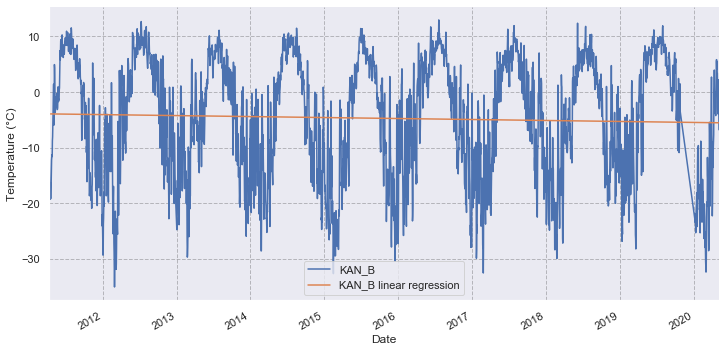

In [362]:
# Plot of temperature change per year

series1['mean'].plot(figsize=(12, 6), label=name)
series1.pred.plot(label= name + ' linear regression')
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
plt.legend()
sns.despine()
plt.savefig('Fig14 - Temperature chaner per year (linear regression) @ '+ name)

In [363]:
from pandas import Grouper
from pandas import DataFrame


series2 = pd.read_csv("Monthly_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'], header=0,squeeze=True)
series2['Date']=pd.to_datetime(series2['Date'])


series2

,Date,mean
0,2011-04-30,-14.286921
1,2011-05-31,-1.397527
2,2011-06-30,7.039333
3,2011-07-31,9.005161
4,2011-08-31,7.187204
...,...,...
105,2020-01-31,-19.172400
106,2020-02-29,-21.192759
107,2020-03-31,-16.338387
108,2020-04-30,-3.844425


In [364]:
series2 = series2.set_index('Date')

In [365]:
series2['Year'] = series2.index.year
series2['Month'] = series2.index.month
series2['Day'] = series2.index.day
series2

,mean,Year,Month,Day
Date,,,,
2011-04-30,-14.286921,2011,4,30
2011-05-31,-1.397527,2011,5,31
2011-06-30,7.039333,2011,6,30
2011-07-31,9.005161,2011,7,31
2011-08-31,7.187204,2011,8,31
...,...,...,...,...
2020-01-31,-19.172400,2020,1,31
2020-02-29,-21.192759,2020,2,29
2020-03-31,-16.338387,2020,3,31


In [366]:
# Transpose the dataset:

series3 = pd.pivot_table(series2, index = 'Year', columns = 'Month', values = 'mean') 
series3

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,NaN,NaN,NaN,-14.286921,-1.397527,7.039333,9.005161,7.187204,0.838736,-7.907339,-11.519431,-13.688360
2012,-16.144328,-15.009454,-18.296559,-3.961819,2.987460,8.227417,9.184745,7.160538,2.924611,-2.619718,-10.190222,-12.431062
2013,-13.297728,-15.485193,-9.031895,-5.195347,-3.506344,6.367958,7.558858,5.043602,1.989333,-4.363804,-10.370778,-15.349583
2014,-11.593145,-13.771830,-15.925753,-11.538792,-0.262742,7.333833,8.794798,7.166667,1.336611,-5.077110,-9.732056,-14.029301
2015,-18.870941,-21.797247,-18.238548,-12.117764,-1.591075,5.824972,8.205108,5.430430,1.155764,-6.467513,-15.532153,-19.473898
2016,-11.537272,-12.477974,-9.494288,0.319597,2.696156,6.841458,8.914220,7.056277,0.526500,-5.450632,-8.609931,-14.839946
2017,-14.742984,-17.143304,-14.522581,-9.862347,2.489798,6.261222,6.663051,6.680417,0.963222,-2.889005,-8.860250,-8.902621
2018,-16.671868,-21.778854,-13.617392,-6.493847,-2.937554,5.616125,7.147944,6.285833,1.104778,-8.165605,-11.679500,-10.293118
2019,-15.297285,-13.736161,-14.485215,-2.941792,5.865605,7.522708,8.750968,6.456048,2.262015,-2.326891,NaN,NaN


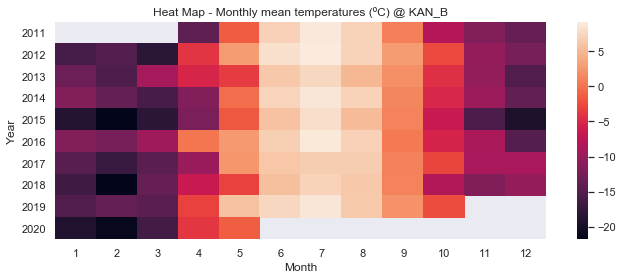

In [367]:
Fig15 = sns.heatmap(series3)
Fig15.set_title('Heat Map - Monthly mean temperatures (ºC) @ '+ name)
plt.savefig('Fig15 - Heat Map - Monthly Temperatures @ '+ name)

In [368]:
# HeatMap for daily temperatures

In [369]:
series4 = pd.read_csv("Daily_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'], header=0,squeeze=True)
series4['Date']=pd.to_datetime(series4['Date'])
series4['day_of_year'] = series4['Date'].dt.dayofyear


In [370]:
series4 = series4.set_index('Date')
series4

,mean,day_of_year
Date,,
2011-04-13,-11.765000,103
2011-04-14,-16.328750,104
2011-04-15,-18.681667,105
2011-04-16,-19.054167,106
2011-04-17,-19.309167,107
...,...,...
2020-05-01,0.847917,122
2020-05-02,0.427917,123
2020-05-03,2.200833,124


In [371]:
series4['Year'] = series4.index.year

series4

,mean,day_of_year,Year
Date,,,
2011-04-13,-11.765000,103,2011
2011-04-14,-16.328750,104,2011
2011-04-15,-18.681667,105,2011
2011-04-16,-19.054167,106,2011
2011-04-17,-19.309167,107,2011
...,...,...,...
2020-05-01,0.847917,122,2020
2020-05-02,0.427917,123,2020
2020-05-03,2.200833,124,2020


In [372]:
series5 = pd.pivot_table(series4, index = 'Year', columns = 'day_of_year', values = 'mean') 
series5

day_of_year,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
Year,,,,,,,,,,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-13.969583,-17.042917,-16.819167,-11.051667,-10.579583,-12.643750,-17.161667,-24.117917,-22.060833,NaN
2012,-24.913333,-27.379583,-29.360833,-29.252500,-23.765417,-22.701250,-20.150000,-18.014583,-20.562083,-13.564583,...,-10.407083,-13.039167,-14.981667,-16.166667,-19.647500,-17.307083,-20.154583,-21.150833,-22.517083,-22.9000
2013,-23.861250,-24.775833,-23.449583,-21.623333,-15.904583,-18.940833,-12.894583,-5.646250,-11.499583,-13.440000,...,-20.480000,-17.835000,-19.189583,-15.386667,-16.743333,-20.241250,-8.433333,-8.452083,-7.055000,NaN
2014,-4.971250,-7.263750,-16.976667,-20.072083,-21.686250,-16.247500,-12.689583,-0.287500,-6.181250,-12.725417,...,-16.320417,-6.792083,-10.920000,-12.974583,0.866667,-0.017500,-4.936250,-7.373750,-14.499583,NaN
2015,-9.183333,-13.170000,-17.890417,-16.741250,-17.569167,-19.867917,-20.269167,-20.550000,-20.952083,-20.265000,...,-27.127917,-20.048750,-5.496667,-2.255417,-4.877917,-12.491667,-15.815417,-20.746667,-24.146250,NaN
2016,-27.280833,-24.595417,-18.860833,-4.123333,-4.827917,-5.978333,-4.704167,-1.460833,-9.888750,-14.615000,...,-22.707083,-25.814167,-23.922500,-26.309167,-27.952500,-23.024583,-23.338333,-27.927917,-22.524167,-5.9375
2017,-0.187083,-10.915833,-12.231250,-12.429167,-20.826667,-11.161667,-10.420000,-15.192917,-13.542083,-19.129167,...,-10.408333,-9.976667,-14.102917,-16.427917,-11.808333,-13.487917,-17.975417,-16.945000,-17.697917,NaN
2018,-17.930417,-23.303333,-23.834167,-22.724583,-19.518333,-9.479167,-6.419167,-11.910417,-16.515000,-16.520833,...,0.975833,-5.766667,-7.452500,-8.284167,-9.570417,-13.152917,-16.371667,-11.680833,-5.093750,NaN
2019,-3.322083,-2.934167,-10.885833,-12.526250,-15.208333,-11.599583,-9.394583,-12.887083,-17.895833,-18.606667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


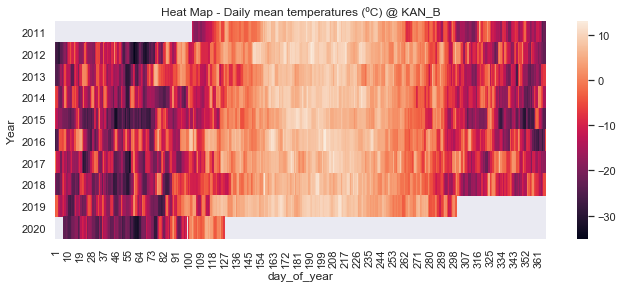

In [373]:
Fig16 = sns.heatmap(series5)
Fig16.set_title('Heat Map - Daily mean temperatures (ºC) @ '+ name)
plt.savefig('Fig16 - Heat Map - Daily Temperatures @ '+ name)

In [374]:
# The end!